In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import randint, uniform

## Colab File Upload

In [ ]:
!git clone https://github.com/galav12/CSC442-Project.git

Cloning into 'CSC442-Project'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 65 (delta 27), reused 25 (delta 7), pack-reused 0 (from 0)
Receiving objects: 100% (65/65), 30.51 MiB | 10.70 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [ ]:
%cd CSC442-Project/
!ls

/content/CSC442-Project
'CSC442 Dataset Report (1).pdf'   Pratyush_Joshi_Homework_6.ipynb
 data				  README.md
 dataset_cleaner.ipynb		  Tanmay_Kapse_Homework6.ipynb
'Homework 6 - GS.ipynb'		  teamnotes


## Query

In [ ]:
merged = pd.read_csv("data/merged_data.csv")
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1841 entries, 0 to 1840
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     1841 non-null   int64  
 1   LocationDesc             1841 non-null   object 
 2   Category                 1841 non-null   object 
 3   Topic                    1841 non-null   object 
 4   Age_18-24                595 non-null    float64
 5   Age_20-24                237 non-null    float64
 6   Age_25-44                1525 non-null   float64
 7   Age_35+                  1841 non-null   float64
 8   Age_45-64                1841 non-null   float64
 9   Age_65+                  1841 non-null   float64
 10  Age_75+                  1837 non-null   float64
 11  Gender_Female            1841 non-null   float64
 12  Gender_Male              1841 non-null   float64
 13  Overall_Overall          1841 non-null   float64
 14  Race_Hispanic           

In [ ]:
query = merged[merged["Category"] == "Cardiovascular Diseases"][["Topic", "Overall_Overall", "CO Mean", "SO2 Mean", "NO2 Mean", "O3 Mean", "CO AQI", "SO2 AQI", "NO2 AQI", "O3 AQI"]]
query

,Topic,Overall_Overall,CO Mean,SO2 Mean,NO2 Mean,O3 Mean,CO AQI,SO2 AQI,NO2 AQI,O3 AQI
0,Acute Myocardial Infarction (Heart Attack),17.8,0.209288,0.434503,11.931810,0.028143,3.458689,1.247863,25.111111,37.017094
1,Coronary Heart Disease,3.9,0.209288,0.434503,11.931810,0.028143,3.458689,1.247863,25.111111,37.017094
2,Major Cardiovascular Disease,8.5,0.209288,0.434503,11.931810,0.028143,3.458689,1.247863,25.111111,37.017094
3,Stroke,3.0,0.209288,0.434503,11.931810,0.028143,3.458689,1.247863,25.111111,37.017094
11,Acute Myocardial Infarction (Heart Attack),6.5,0.340206,1.262189,7.876934,0.028954,4.712557,2.210287,17.862330,34.302572
...,...,...,...,...,...,...,...,...,...,...
1822,Stroke,2.7,0.191788,0.742099,8.434649,0.023791,2.423729,1.406780,19.220339,30.381356
1830,Acute Myocardial Infarction (Heart Attack),4.7,0.131982,0.210427,8.413987,0.029742,2.157895,0.526316,22.842105,34.105263
1831,Coronary Heart Disease,3.4,0.131982,0.210427,8.413987,0.029742,2.157895,0.526316,22.842105,34.105263
1832,Major Cardiovascular Disease,7.7,0.131982,0.210427,8.413987,0.029742,2.157895,0.526316,22.842105,34.105263


## EDA

In [ ]:
query.describe()

,Overall_Overall,CO Mean,SO2 Mean,NO2 Mean,O3 Mean,CO AQI,SO2 AQI,NO2 AQI,O3 AQI
count,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000
mean,5.331952,0.236857,0.585762,8.628960,0.026967,3.435060,1.386535,18.340135,33.701205
std,3.262410,0.048944,0.330908,2.479306,0.003065,0.704405,0.806858,3.972285,2.977117
min,1.800000,0.131982,0.022730,1.782609,0.014166,2.000000,0.000000,7.000000,21.437500
25%,3.300000,0.205212,0.334774,7.151438,0.025398,2.987261,0.738680,15.363874,32.237179
50%,4.300000,0.233333,0.519980,8.434649,0.026989,3.396970,1.247863,18.273292,33.671642
75%,6.600000,0.261664,0.790987,10.140852,0.028721,3.817427,2.054852,20.982143,35.570934
max,31.250000,0.409548,2.376164,15.009458,0.041500,6.117647,4.750000,27.654206,41.000000


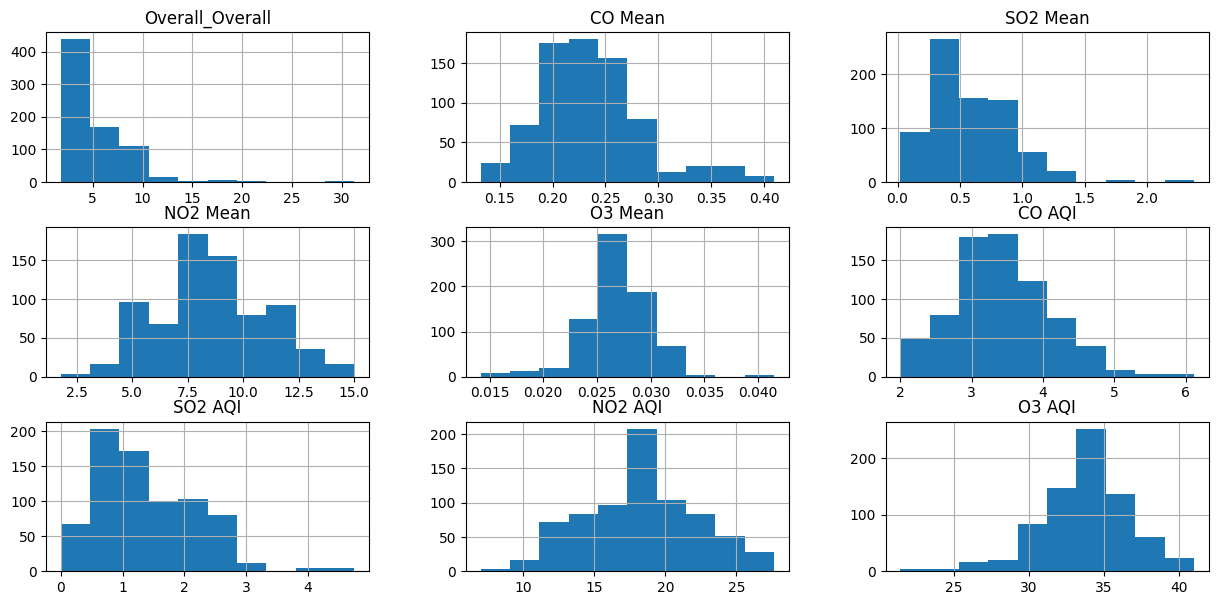

In [ ]:
query.hist(figsize=(15,7))
plt.show()

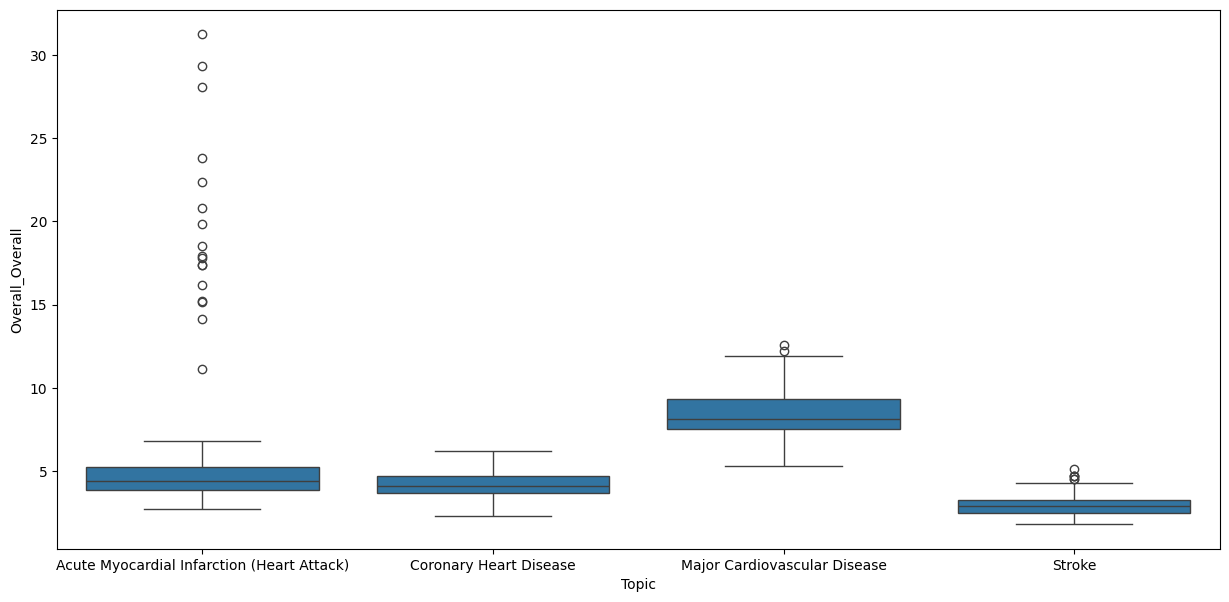

In [ ]:
plt.figure(figsize= (15,7))
sns.boxplot(x="Topic", y = "Overall_Overall", data = query)
plt.show()

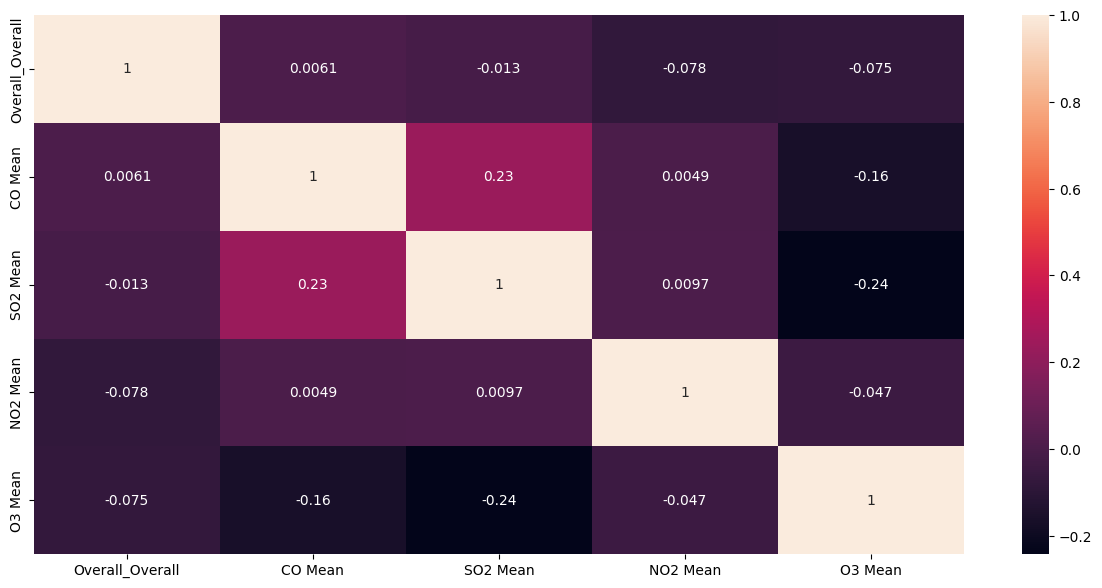

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(query[['Overall_Overall', 'CO Mean', 'SO2 Mean', 'NO2 Mean', 'O3 Mean']].corr(), annot=True)
plt.show()


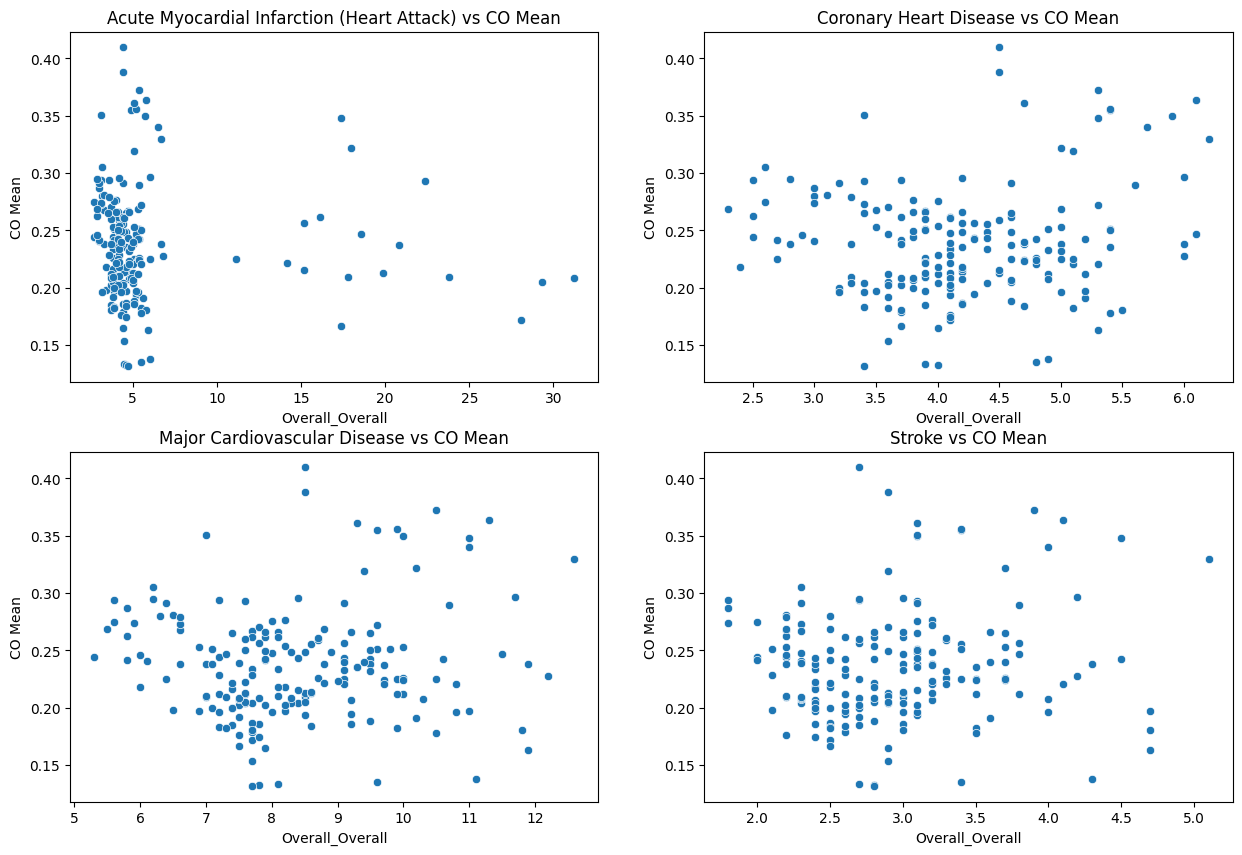

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.title("Acute Myocardial Infarction (Heart Attack) vs CO Mean")
sns.scatterplot(x = "Overall_Overall", y = "CO Mean", data = query[query['Topic'] == 'Acute Myocardial Infarction (Heart Attack)'])
plt.subplot(2, 2, 2)
plt.title("Coronary Heart Disease vs CO Mean")
sns.scatterplot(x = "Overall_Overall", y = "CO Mean", data = query[query['Topic'] == 'Coronary Heart Disease'])
plt.subplot(2, 2, 3)
plt.title("Major Cardiovascular Disease vs CO Mean")
sns.scatterplot(x = "Overall_Overall", y = "CO Mean", data = query[query['Topic'] == 'Major Cardiovascular Disease'])
plt.subplot(2, 2, 4)
plt.title("Stroke vs CO Mean")
sns.scatterplot(x = "Overall_Overall", y = "CO Mean", data = query[query['Topic'] == 'Stroke'])
plt.show()

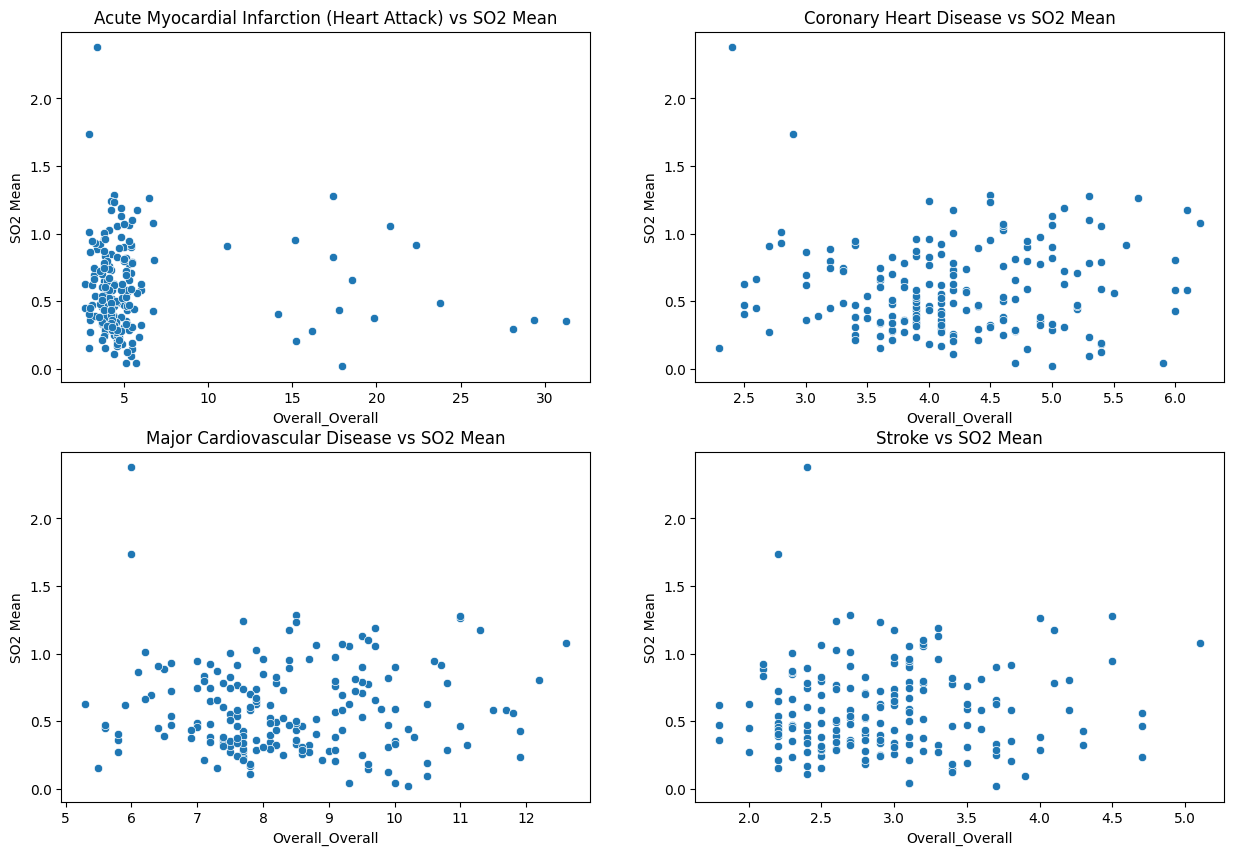

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.title("Acute Myocardial Infarction (Heart Attack) vs SO2 Mean")
sns.scatterplot(x = "Overall_Overall", y = "SO2 Mean", data = query[query['Topic'] == 'Acute Myocardial Infarction (Heart Attack)'])
plt.subplot(2, 2, 2)
plt.title("Coronary Heart Disease vs SO2 Mean")
sns.scatterplot(x = "Overall_Overall", y = "SO2 Mean", data = query[query['Topic'] == 'Coronary Heart Disease'])
plt.subplot(2, 2, 3)
plt.title("Major Cardiovascular Disease vs SO2 Mean")
sns.scatterplot(x = "Overall_Overall", y = "SO2 Mean", data = query[query['Topic'] == 'Major Cardiovascular Disease'])
plt.subplot(2, 2, 4)
plt.title("Stroke vs SO2 Mean")
sns.scatterplot(x = "Overall_Overall", y = "SO2 Mean", data = query[query['Topic'] == 'Stroke'])
plt.show()

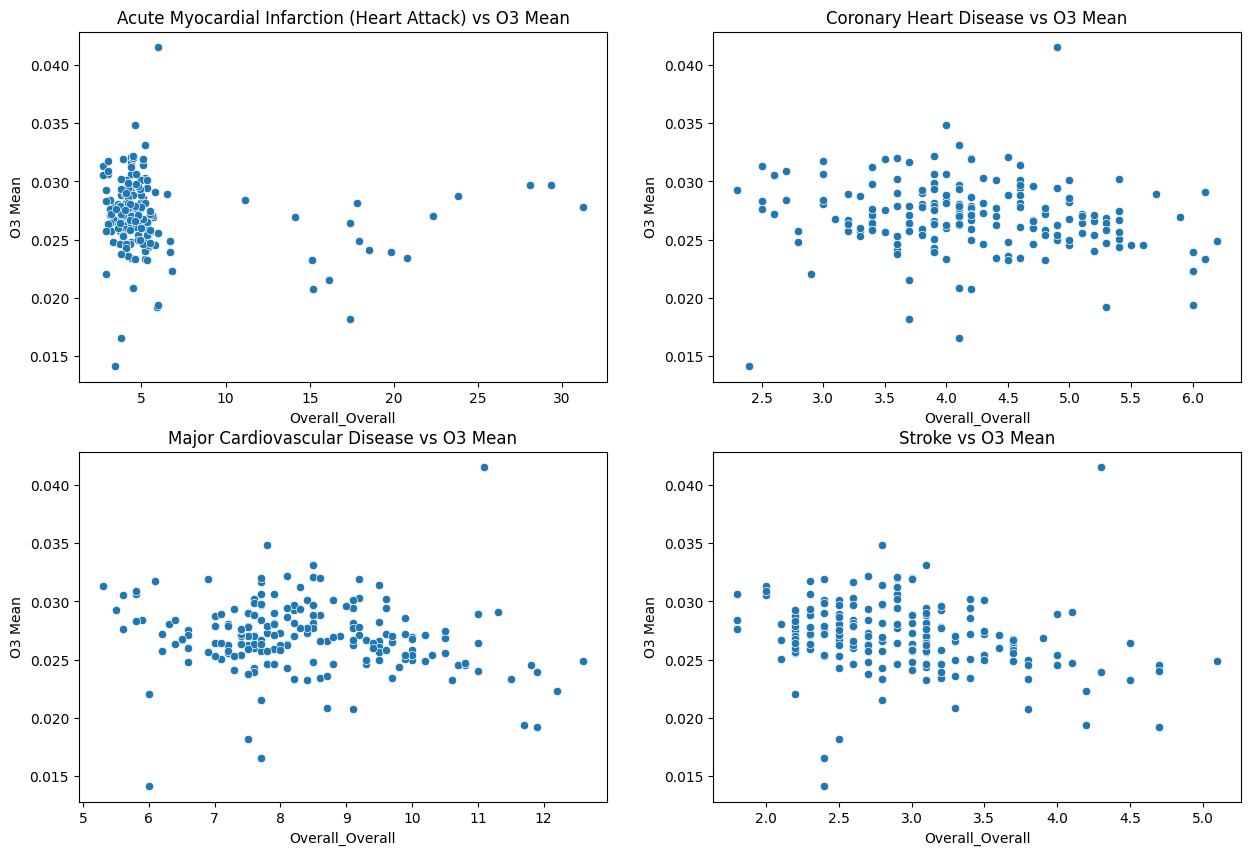

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.title("Acute Myocardial Infarction (Heart Attack) vs O3 Mean")
sns.scatterplot(x = "Overall_Overall", y = "O3 Mean", data = query[query['Topic'] == 'Acute Myocardial Infarction (Heart Attack)'])
plt.subplot(2, 2, 2)
plt.title("Coronary Heart Disease vs O3 Mean")
sns.scatterplot(x = "Overall_Overall", y = "O3 Mean", data = query[query['Topic'] == 'Coronary Heart Disease'])
plt.subplot(2, 2, 3)
plt.title("Major Cardiovascular Disease vs O3 Mean")
sns.scatterplot(x = "Overall_Overall", y = "O3 Mean", data = query[query['Topic'] == 'Major Cardiovascular Disease'])
plt.subplot(2, 2, 4)
plt.title("Stroke vs O3 Mean")
sns.scatterplot(x = "Overall_Overall", y = "O3 Mean", data = query[query['Topic'] == 'Stroke'])
plt.show()

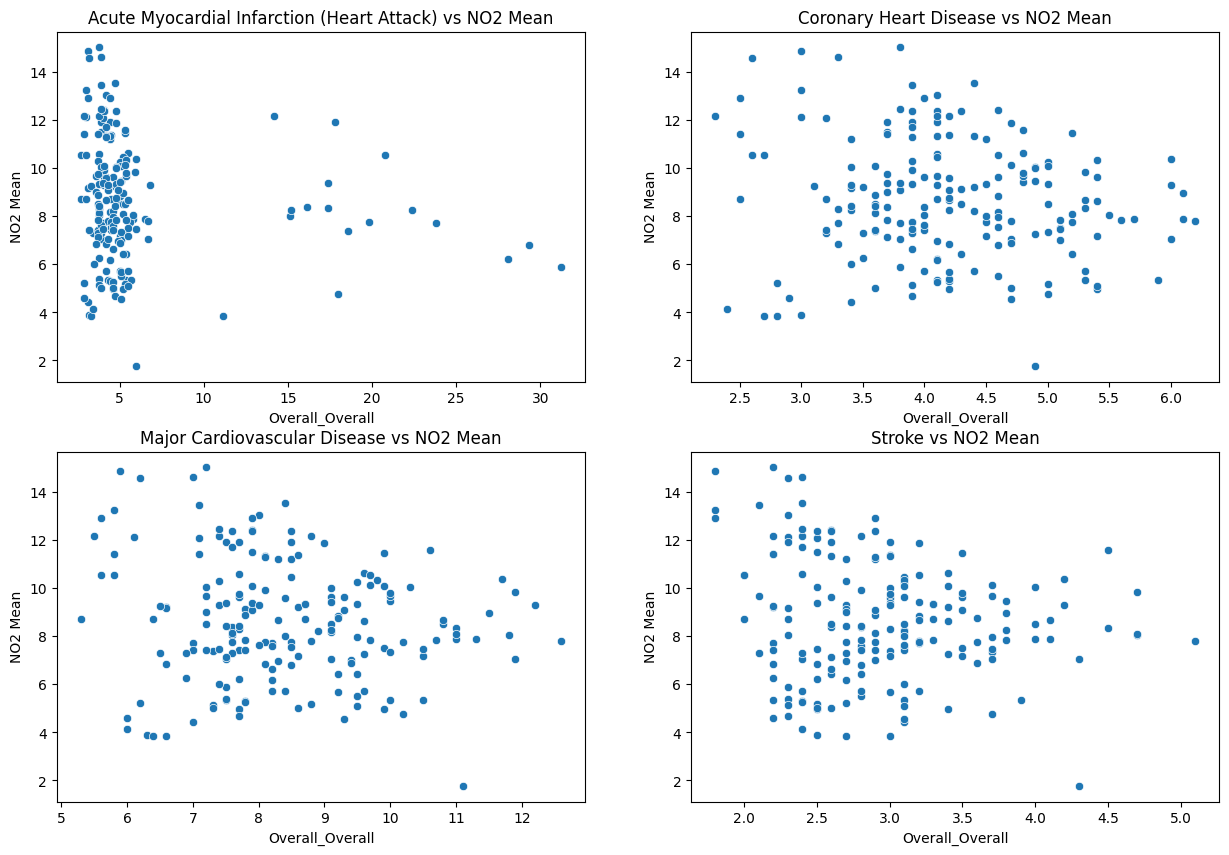

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.title("Acute Myocardial Infarction (Heart Attack) vs NO2 Mean")
sns.scatterplot(x = "Overall_Overall", y = "NO2 Mean", data = query[query['Topic'] == 'Acute Myocardial Infarction (Heart Attack)'])
plt.subplot(2, 2, 2)
plt.title("Coronary Heart Disease vs NO2 Mean")
sns.scatterplot(x = "Overall_Overall", y = "NO2 Mean", data = query[query['Topic'] == 'Coronary Heart Disease'])
plt.subplot(2, 2, 3)
plt.title("Major Cardiovascular Disease vs NO2 Mean")
sns.scatterplot(x = "Overall_Overall", y = "NO2 Mean", data = query[query['Topic'] == 'Major Cardiovascular Disease'])
plt.subplot(2, 2, 4)
plt.title("Stroke vs NO2 Mean")
sns.scatterplot(x = "Overall_Overall", y = "NO2 Mean", data = query[query['Topic'] == 'Stroke'])
plt.show()

## Regression Models

### Linear Regresion

In [ ]:
# Fitting the model for each cardiovascular disease

idx = []
rmse = []
r2 = []

for i in query['Topic'].unique():
  X_train, X_test, y_train, y_test = train_test_split(query[query['Topic'] == i].drop(columns=['Topic','Overall_Overall']), query[query['Topic'] == i][['Overall_Overall']].values.ravel(), test_size=0.2, random_state=48)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  idx.append(i)
  rmse.append((mean_squared_error(y_test, y_pred))**0.5)
  r2.append(r2_score(y_test, y_pred))

acc = pd.DataFrame({'Topic': idx})
acc["LR_RMSE"] = rmse
acc["LR_R2"] = r2
acc

,Topic,LR_RMSE,LR_R2
0,Acute Myocardial Infarction (Heart Attack),5.842933,-0.135112
1,Coronary Heart Disease,0.859307,-0.045140
2,Major Cardiovascular Disease,1.565757,-0.038860
3,Stroke,0.685589,0.038589


### Decision Tree

In [ ]:
# Single Hyperparameter Tuning with average r2 score. Uncomment to check.

# X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(query[query['Topic'] == 'Coronary Heart Disease'].drop(columns=['Topic','Overall_Overall']), query[query['Topic'] == 'Coronary Heart Disease'][['Overall_Overall']].values.ravel(), test_size=0.2, random_state=48)
# X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(query[query['Topic'] == 'Major Cardiovascular Disease'].drop(columns=['Topic','Overall_Overall']), query[query['Topic'] == 'Major Cardiovascular Disease'][['Overall_Overall']].values.ravel(), test_size=0.2, random_state=48)
# X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(query[query['Topic'] == 'Stroke'].drop(columns=['Topic','Overall_Overall']), query[query['Topic'] == 'Stroke'][['Overall_Overall']].values.ravel(), test_size=0.2, random_state=48)

# r2_test_init = 0
# model = DecisionTreeRegressor(random_state=48)
# model.fit(X_train_1, y_train_1)
# r2_test_init += r2_score(y_test_1, model.predict(X_test_1))
# model.fit(X_train_2, y_train_2)
# r2_test_init += r2_score(y_test_2, model.predict(X_test_2))
# model.fit(X_train_3, y_train_3)
# r2_test_init += r2_score(y_test_3, model.predict(X_test_3))
# r2_test_init /= 3
# print(f'Base model r2 score: {r2_test_init:.5f}')
# print()

# param_grid = {
#   'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
#   'max_depth': [None, 10, 20, 30, 40, 50],
#   'min_samples_split': [2, 5, 10, 20],
#   'min_samples_leaf': [1, 2, 4, 6],
#   'max_features': ['sqrt', 'log2', 0.5, 0.8, 1.0],
#   'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
# }
# for i in param_grid.keys():
#   results = []
#   for j in param_grid[i]:
#     r2_test = 0
#     r2_train = 0
#     dt = DecisionTreeRegressor(min_samples_leaf=6, max_leaf_nodes=10, max_features=0.8, random_state=48)
#     model = dt.set_params(**{i: j})
#     model.fit(X_train_1, y_train_1)
#     r2_test += r2_score(y_test_1, model.predict(X_test_1))
#     r2_train += r2_score(y_train_1, model.predict(X_train_1))
#     model.fit(X_train_2, y_train_2)
#     r2_test += r2_score(y_test_2, model.predict(X_test_2))
#     r2_train += r2_score(y_train_2, model.predict(X_train_2))
#     model.fit(X_train_3, y_train_3)
#     r2_test += r2_score(y_test_3, model.predict(X_test_3))
#     r2_train += r2_score(y_train_3, model.predict(X_train_3))
#     r2_test /= 3
#     r2_train /= 3
#     results.append((i, j, r2_test, r2_train))

#   # Sort and print
#   results_sorted = sorted(results, key=lambda x: float(x[2]), reverse=True)
#   print(f"Top {i} by test r2:")
#   for param, param_val, r2_test, r2_train in results_sorted[:3]:
#     print(f"{param}={param_val}, test r2={r2_test:.5f}, train r2={r2_train:.5f}")
#   print()

In [ ]:
# Fitting the model for each cardiovascular disease

idx = []
rmse = []
r2 = []

for i in query['Topic'].unique():
  X_train, X_test, y_train, y_test = train_test_split(query[query['Topic'] == i].drop(columns=['Topic','Overall_Overall']), query[query['Topic'] == i][['Overall_Overall']].values.ravel(), test_size=0.2, random_state=48)
  model = DecisionTreeRegressor(min_samples_leaf=6, max_leaf_nodes=10, max_features=0.8, random_state=48)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  idx.append(i)
  rmse.append((mean_squared_error(y_test, y_pred))**0.5)
  r2.append(r2_score(y_test, y_pred))

acc["DT_RMSE"] = rmse
acc["DT_R2"] = r2
acc

,Topic,LR_RMSE,LR_R2,DT_RMSE,DT_R2
0,Acute Myocardial Infarction (Heart Attack),5.842933,-0.135112,6.421249,-0.370932
1,Coronary Heart Disease,0.859307,-0.045140,0.734557,0.236290
2,Major Cardiovascular Disease,1.565757,-0.038860,1.105223,0.482383
3,Stroke,0.685589,0.038589,0.463654,0.560288


### Random Forest

In [ ]:
# Single Hyperparameter Tuning with average r2 score. Uncomment to check.

# X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(query[query['Topic'] == 'Coronary Heart Disease'].drop(columns=['Topic','Overall_Overall']), query[query['Topic'] == 'Coronary Heart Disease'][['Overall_Overall']].values.ravel(), test_size=0.2, random_state=48)
# X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(query[query['Topic'] == 'Major Cardiovascular Disease'].drop(columns=['Topic','Overall_Overall']), query[query['Topic'] == 'Major Cardiovascular Disease'][['Overall_Overall']].values.ravel(), test_size=0.2, random_state=48)
# X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(query[query['Topic'] == 'Stroke'].drop(columns=['Topic','Overall_Overall']), query[query['Topic'] == 'Stroke'][['Overall_Overall']].values.ravel(), test_size=0.2, random_state=48)

# r2_test_init = 0
# model = RandomForestRegressor(random_state=48)
# model.fit(X_train_1, y_train_1)
# r2_test_init += r2_score(y_test_1, model.predict(X_test_1))
# model.fit(X_train_2, y_train_2)
# r2_test_init += r2_score(y_test_2, model.predict(X_test_2))
# model.fit(X_train_3, y_train_3)
# r2_test_init += r2_score(y_test_3, model.predict(X_test_3))
# r2_test_init /= 3
# print(f'Base model r2 score: {r2_test_init:.5f}')
# print()

# param_grid = {
#   # 'n_estimators': np.arange(100, 501, 5),
#   # 'max_depth': [None, 10, 20, 30, 40, 50],
#   'min_samples_split': [2, 5, 10, 20],
#   'min_samples_leaf': [1, 2, 4, 6],
#   'max_features': ['sqrt', 'log2', 0.5, 0.8, 1.0],
#   'bootstrap': [True, False]
# }
# for i in param_grid.keys():
#   results = []
#   for j in param_grid[i]:
#     r2_test = 0
#     r2_train = 0
#     rf = RandomForestRegressor(n_estimators=190, max_depth=20, random_state=48)
#     model = rf.set_params(**{i: j})
#     model.fit(X_train_1, y_train_1)
#     r2_test += r2_score(y_test_1, model.predict(X_test_1))
#     r2_train += r2_score(y_train_1, model.predict(X_train_1))
#     model.fit(X_train_2, y_train_2)
#     r2_test += r2_score(y_test_2, model.predict(X_test_2))
#     r2_train += r2_score(y_train_2, model.predict(X_train_2))
#     model.fit(X_train_3, y_train_3)
#     r2_test += r2_score(y_test_3, model.predict(X_test_3))
#     r2_train += r2_score(y_train_3, model.predict(X_train_3))
#     r2_test /= 3
#     r2_train /= 3
#     results.append((i, j, r2_test, r2_train))

#   # Sort and print
#   results_sorted = sorted(results, key=lambda x: float(x[2]), reverse=True)
#   print(f"Top {i} by test r2:")
#   for param, param_val, r2_test, r2_train in results_sorted[:3]:
#     print(f"{param}={param_val}, test r2={r2_test:.5f}, train r2={r2_train:.5f}")
#   print()

In [ ]:
# Fitting the model for each cardiovascular disease

idx = []
rmse = []
r2 = []

for i in query['Topic'].unique():
  X_train, X_test, y_train, y_test = train_test_split(query[query['Topic'] == i].drop(columns=['Topic','Overall_Overall']), query[query['Topic'] == i][['Overall_Overall']].values.ravel(), test_size=0.2, random_state=48)
  model = RandomForestRegressor(n_estimators=190, max_depth=20, random_state=48)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  idx.append(i)
  rmse.append((mean_squared_error(y_test, y_pred))**0.5)
  r2.append(r2_score(y_test, y_pred))

acc["RF_RMSE"] = rmse
acc["RF_R2"] = r2
acc

,Topic,LR_RMSE,LR_R2,DT_RMSE,DT_R2,RF_RMSE,RF_R2
0,Acute Myocardial Infarction (Heart Attack),5.842933,-0.135112,6.421249,-0.370932,5.935286,-0.171278
1,Coronary Heart Disease,0.859307,-0.045140,0.734557,0.236290,0.627704,0.442318
2,Major Cardiovascular Disease,1.565757,-0.038860,1.105223,0.482383,1.031165,0.549427
3,Stroke,0.685589,0.038589,0.463654,0.560288,0.479176,0.530353


### Support Vector Machine

In [ ]:
# Single Hyperparameter Tuning with average r2 score. Uncomment to check.

# X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(query[query['Topic'] == 'Coronary Heart Disease'].drop(columns=['Topic','Overall_Overall']), query[query['Topic'] == 'Coronary Heart Disease'][['Overall_Overall']].values.ravel(), test_size=0.2, random_state=48)
# X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(query[query['Topic'] == 'Major Cardiovascular Disease'].drop(columns=['Topic','Overall_Overall']), query[query['Topic'] == 'Major Cardiovascular Disease'][['Overall_Overall']].values.ravel(), test_size=0.2, random_state=48)
# X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(query[query['Topic'] == 'Stroke'].drop(columns=['Topic','Overall_Overall']), query[query['Topic'] == 'Stroke'][['Overall_Overall']].values.ravel(), test_size=0.2, random_state=48)
# scaler = StandardScaler()
# X_train_1 = scaler.fit_transform(X_train_1)
# X_test_1 = scaler.transform(X_test_1)
# X_train_2 = scaler.fit_transform(X_train_2)
# X_test_2 = scaler.transform(X_test_2)
# X_train_3 = scaler.fit_transform(X_train_3)
# X_test_3 = scaler.transform(X_test_3)

# r2_test_init = 0
# model = SVR()
# model.fit(X_train_1, y_train_1)
# r2_test_init += r2_score(y_test_1, model.predict(X_test_1))
# model.fit(X_train_2, y_train_2)
# r2_test_init += r2_score(y_test_2, model.predict(X_test_2))
# model.fit(X_train_3, y_train_3)
# r2_test_init += r2_score(y_test_3, model.predict(X_test_3))
# r2_test_init /= 3
# print(f'Base model r2 score: {r2_test_init:.5f}')
# print()

# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
#     'gamma': ['scale', 'auto', 0.0001, 0.001, 0.01, 0.1],
#     'degree': [2, 3, 4, 5]
# }
# for i in param_grid.keys():
#   results = []
#   for j in param_grid[i]:
#     r2_test = 0
#     r2_train = 0
#     svr = SVR(C=10)
#     model = svr.set_params(**{i: j})
#     model.fit(X_train_1, y_train_1)
#     r2_test += r2_score(y_test_1, model.predict(X_test_1))
#     r2_train += r2_score(y_train_1, model.predict(X_train_1))
#     model.fit(X_train_2, y_train_2)
#     r2_test += r2_score(y_test_2, model.predict(X_test_2))
#     r2_train += r2_score(y_train_2, model.predict(X_train_2))
#     model.fit(X_train_3, y_train_3)
#     r2_test += r2_score(y_test_3, model.predict(X_test_3))
#     r2_train += r2_score(y_train_3, model.predict(X_train_3))
#     r2_test /= 3
#     r2_train /= 3
#     results.append((i, j, r2_test, r2_train))

#   # Sort and print
#   results_sorted = sorted(results, key=lambda x: float(x[2]), reverse=True)
#   print(f"Top {i} by test r2:")
#   for param, param_val, r2_test, r2_train in results_sorted[:3]:
#     print(f"{param}={param_val}, test r2={r2_test:.5f}, train r2={r2_train:.5f}")
#   print()

In [ ]:
# Fitting the model for each cardiovascular disease

idx = []
rmse = []
r2 = []

for i in query['Topic'].unique():
  X_train, X_test, y_train, y_test = train_test_split(query[query['Topic'] == i].drop(columns=['Topic','Overall_Overall']), query[query['Topic'] == i][['Overall_Overall']].values.ravel(), test_size=0.2, random_state=48)
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  model = SVR(C=10)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  idx.append(i)
  rmse.append((mean_squared_error(y_test, y_pred))**0.5)
  r2.append(r2_score(y_test, y_pred))

acc["SVR_RMSE"] = rmse
acc["SVR_R2"] = r2
acc

,Topic,LR_RMSE,LR_R2,DT_RMSE,DT_R2,RF_RMSE,RF_R2,SVR_RMSE,SVR_R2
0,Acute Myocardial Infarction (Heart Attack),5.842933,-0.135112,6.421249,-0.370932,5.935286,-0.171278,5.793335,-0.115923
1,Coronary Heart Disease,0.859307,-0.045140,0.734557,0.236290,0.627704,0.442318,0.788798,0.119339
2,Major Cardiovascular Disease,1.565757,-0.038860,1.105223,0.482383,1.031165,0.549427,1.230266,0.358633
3,Stroke,0.685589,0.038589,0.463654,0.560288,0.479176,0.530353,0.518239,0.450661


### Gradient Boost

In [ ]:
# Single Hyperparameter Tuning with average r2 score. Uncomment to check.

# X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(query[query['Topic'] == 'Coronary Heart Disease'].drop(columns=['Topic','Overall_Overall']), query[query['Topic'] == 'Coronary Heart Disease'][['Overall_Overall']].values.ravel(), test_size=0.2, random_state=48)
# X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(query[query['Topic'] == 'Major Cardiovascular Disease'].drop(columns=['Topic','Overall_Overall']), query[query['Topic'] == 'Major Cardiovascular Disease'][['Overall_Overall']].values.ravel(), test_size=0.2, random_state=48)
# X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(query[query['Topic'] == 'Stroke'].drop(columns=['Topic','Overall_Overall']), query[query['Topic'] == 'Stroke'][['Overall_Overall']].values.ravel(), test_size=0.2, random_state=48)

# r2_test_init = 0
# model = GradientBoostingRegressor(random_state=48)
# model.fit(X_train_1, y_train_1)
# r2_test_init += r2_score(y_test_1, model.predict(X_test_1))
# model.fit(X_train_2, y_train_2)
# r2_test_init += r2_score(y_test_2, model.predict(X_test_2))
# model.fit(X_train_3, y_train_3)
# r2_test_init += r2_score(y_test_3, model.predict(X_test_3))
# r2_test_init /= 3
# print(f'Base model r2 score: {r2_test_init:.5f}')
# print()

# param_grid = {
#     'n_estimators': np.arange(100, 501, 5),
#     'learning_rate': np.round(np.arange(0.01, 0.3, 0.01), 2),
#     'max_depth': [3, 4, 5, 6, 7],
#     'min_samples_split': [2, 5, 10, 20],
#     'min_samples_leaf': [1, 2, 4, 6],
#     'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
#     'max_features': ['sqrt', 'log2', 0.5, 0.8, 1.0]
# }
# for i in param_grid.keys():
#   results = []
#   for j in param_grid[i]:
#     r2_test = 0
#     r2_train = 0
#     gbr = GradientBoostingRegressor(min_samples_leaf=2, random_state=48)
#     model = gbr.set_params(**{i: j})
#     model.fit(X_train_1, y_train_1)
#     r2_test += r2_score(y_test_1, model.predict(X_test_1))
#     r2_train += r2_score(y_train_1, model.predict(X_train_1))
#     model.fit(X_train_2, y_train_2)
#     r2_test += r2_score(y_test_2, model.predict(X_test_2))
#     r2_train += r2_score(y_train_2, model.predict(X_train_2))
#     model.fit(X_train_3, y_train_3)
#     r2_test += r2_score(y_test_3, model.predict(X_test_3))
#     r2_train += r2_score(y_train_3, model.predict(X_train_3))
#     r2_test /= 3
#     r2_train /= 3
#     results.append((i, j, r2_test, r2_train))
#     # print(f'{i}: {j}, test: {r2_test}, train: {r2_train}')

#   # Sort and print
#   results_sorted = sorted(results, key=lambda x: float(x[2]), reverse=True)
#   print(f"Top {i} by test r2:")
#   for param, param_val, r2_test, r2_train in results_sorted[:3]:
#     print(f"{param}={param_val}, test r2={r2_test:.5f}, train r2={r2_train:.5f}")
#   print()

In [ ]:
# Fitting the model for each cardiovascular disease

idx = []
rmse = []
r2 = []
features = []

for i in query['Topic'].unique():
  X_train, X_test, y_train, y_test = train_test_split(query[query['Topic'] == i].drop(columns=['Topic','Overall_Overall']), query[query['Topic'] == i][['Overall_Overall']].values.ravel(), test_size=0.2, random_state=48)
  model = GradientBoostingRegressor(min_samples_leaf=2, random_state=48)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  idx.append(i)
  rmse.append((mean_squared_error(y_test, y_pred))**0.5)
  r2.append(r2_score(y_test, y_pred))
  features.append((i, {model.feature_names_in_[i]: float(model.feature_importances_[i]) for i in range(len(model.feature_names_in_))}))

acc["GB_RMSE"] = rmse
acc["GB_R2"] = r2
acc

,Topic,LR_RMSE,LR_R2,DT_RMSE,DT_R2,RF_RMSE,RF_R2,SVR_RMSE,SVR_R2,GB_RMSE,GB_R2
0,Acute Myocardial Infarction (Heart Attack),5.842933,-0.135112,6.421249,-0.370932,5.935286,-0.171278,5.793335,-0.115923,6.362121,-0.345801
1,Coronary Heart Disease,0.859307,-0.045140,0.734557,0.236290,0.627704,0.442318,0.788798,0.119339,0.648347,0.405033
2,Major Cardiovascular Disease,1.565757,-0.038860,1.105223,0.482383,1.031165,0.549427,1.230266,0.358633,0.995762,0.579836
3,Stroke,0.685589,0.038589,0.463654,0.560288,0.479176,0.530353,0.518239,0.450661,0.447834,0.589782


### Model Evaluation

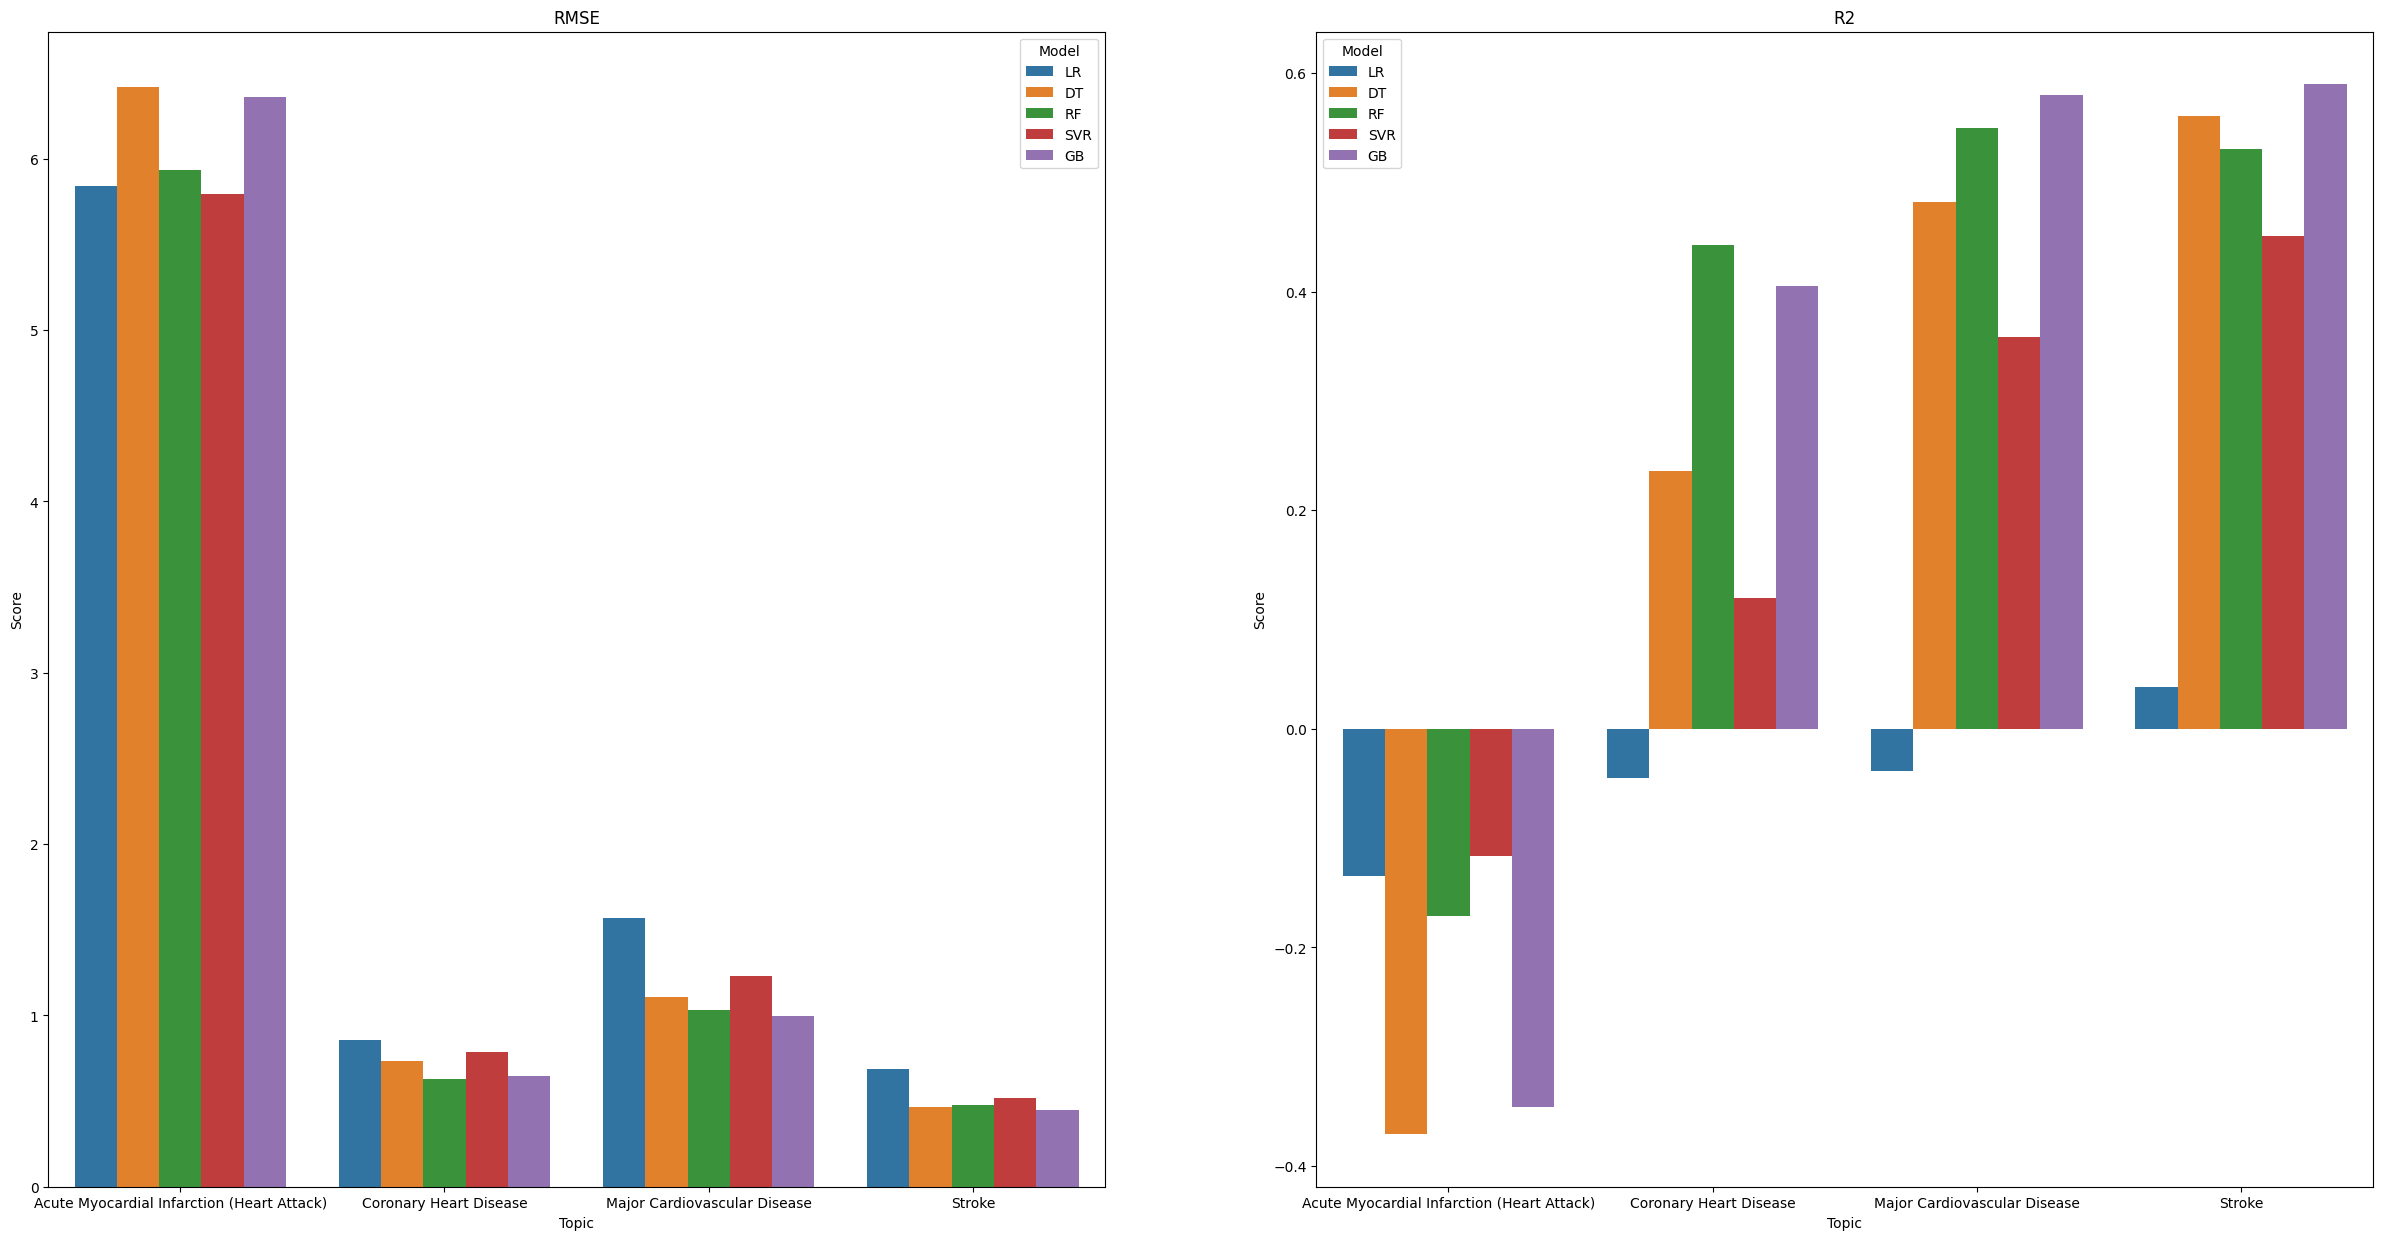

In [30]:
# Melting dataframe to create plot
melt = acc.melt(id_vars=["Topic"], var_name="Model_Metric", value_name="Score")
melt[['Model', 'Metric']] = melt['Model_Metric'].str.split('_', expand=True)
melt = melt.drop(columns=['Model_Metric'])

# Plotting r2 and rmse
plt.figure(figsize=(30, 15))
plt.subplot(1, 2, 1)
plt.title("RMSE")
sns.barplot(x = "Topic", y = "Score", data = melt[melt['Metric'] == "RMSE"] , hue =  "Model")
plt.subplot(1, 2, 2)
plt.title("R2")
sns.barplot(x = "Topic", y = "Score", data = melt[melt['Metric'] == "R2"] , hue =  "Model")
plt.show()

### Effect of Single Pollutant

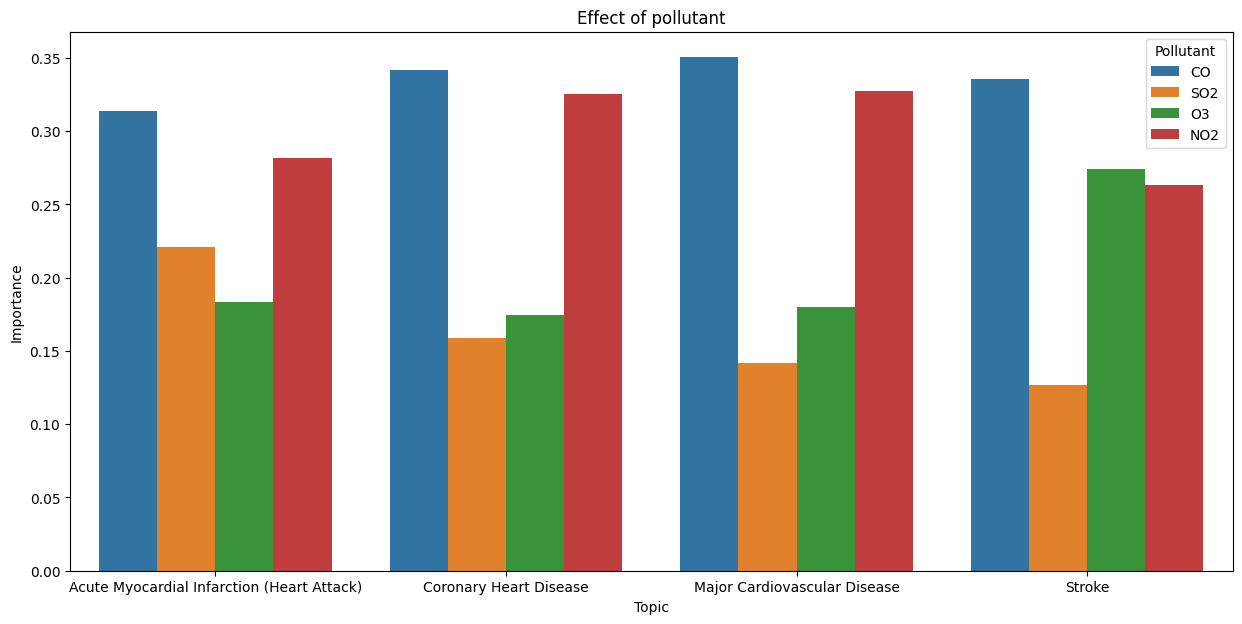

In [ ]:
# Finding importance of individual pollutants by using feature importances
importances_df = pd.DataFrame({'Pollutant': ['CO', 'SO2', 'O3', 'NO2']})
for i in features:
  importances = {'CO': 0, 'SO2': 0, 'O3': 0, 'NO2': 0}
  for j in i[1]:
    if 'CO' in j:
      importances['CO'] += i[1][j]
    elif 'SO2' in j:
      importances['SO2'] += i[1][j]
    elif 'O3' in j:
      importances['O3'] += i[1][j]
    elif 'NO2' in j:
      importances['NO2'] += i[1][j]
  importances_df[i[0]] = importances.values()

# Melting data to create plot
importances_df = importances_df.melt(id_vars=["Pollutant"], var_name="Topic", value_name="Importance")
importances_df

# Plotting r2 and rmse
plt.figure(figsize=(15, 7))
plt.title("Effect of pollutant")
sns.barplot(x = "Topic", y = "Importance", data = importances_df , hue =  "Pollutant")
plt.show()